In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import keras
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing import text,sequence
from keras import Sequential
from keras.layers import Embedding, Dense, LSTM, Dropout
from nltk.stem.porter import PorterStemmer
from keras.utils import pad_sequences
import nltk
import regex as re
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
import random

In [4]:
pip install bs4

In [5]:
true_news=pd.read_csv("/content/drive/MyDrive/codxo projects/true.csv")
fake_news=pd.read_csv("/content/drive/MyDrive/codxo projects/fake.csv")

In [6]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
true_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [9]:
fake_news.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [10]:
true_news["class"]=0
fake_news["class"]=1

In [11]:
#downloading nltk resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
true_news.shape

(21417, 5)

In [25]:
fake_news.shape

(23481, 5)

In [26]:
news=pd.concat([true_news,fake_news],ignore_index=True,axis=0)

In [27]:
news.shape

(44898, 5)

<Axes: xlabel='class', ylabel='count'>

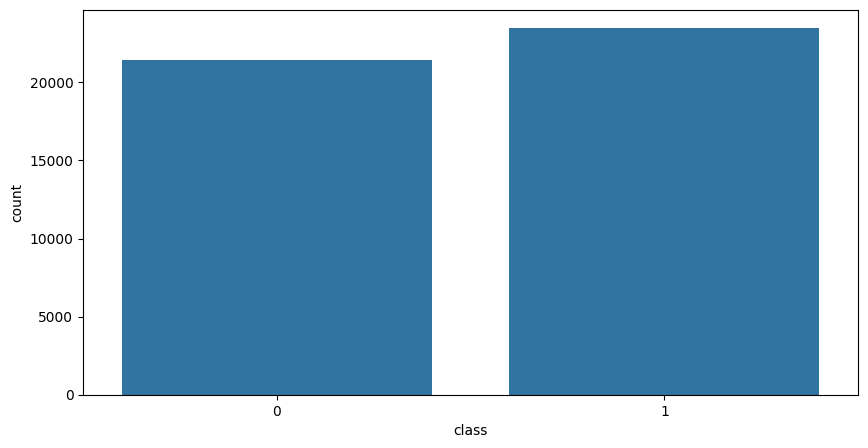

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x="class",data=news)

<Axes: xlabel='subject', ylabel='count'>

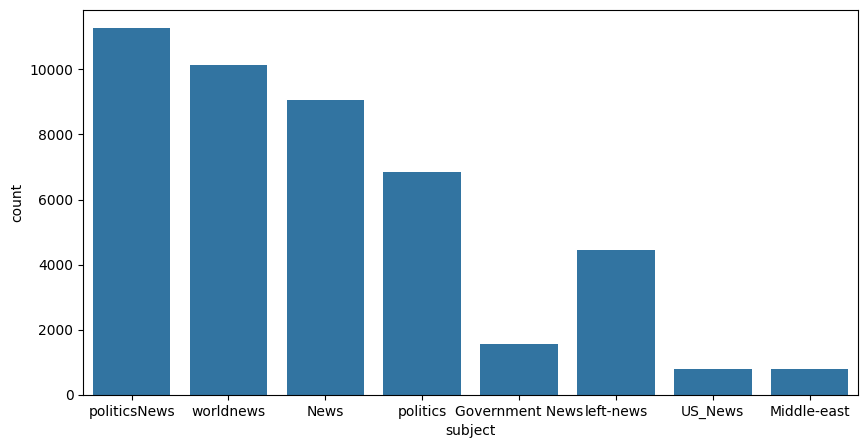

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x="subject",data=news)

In [30]:
news["subject"].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [31]:
# Deleting unwanted columns
news.drop(["date"],axis=1,inplace=True)
news.drop(["title"],axis=1,inplace=True)
news.drop(["subject"],axis=1,inplace=True)

In [32]:
news.head()

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,0
1,WASHINGTON (Reuters) - Transgender people will...,0
2,WASHINGTON (Reuters) - The special counsel inv...,0
3,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


class
1    23481
0    21417
Name: count, dtype: int64


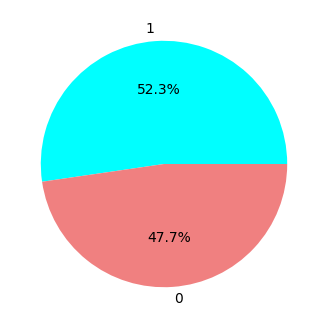

In [33]:
print(news["class"].value_counts())
fig, ax = plt.subplots(figsize=(12, 4))
ax.pie(news["class"].value_counts().values, autopct='%1.1f%%', labels= news["class"].value_counts().index, colors=["cyan", "lightcoral"])
fig.show()

In [34]:
pd.set_option('display.max_colwidth', 500)
random = np.random.randint(0,len(news),12)
#selecting 12 rows based on the index
news.iloc[random]

,text,class
28916,"Donald Trump has watched from the stage as his rabid supporters have brutally assaulted the people who come out to protest him. Oftentimes, he even urges them on whipping his followers into a violent frenzy with unfounded accusations that the protesters are working for ISIS or were sent by Bernie Sanders and deserve it. After this week saw nearly every Trump rally end in assaults and racial and ethnic slurs, the question turned from Will someone be killed at a Trump rally? to When? Tru...",1
512,"WASHINGTON (Reuters) - A senior U.S. official overseeing a reorganization of the State Department that has been criticized by current and former U.S. diplomats has stepped down after less than four months on the job, U.S. officials said on Monday. Maliz Beams, a former financial industry executive who was named State Department counselor on Aug. 17, is “stepping away” to return to Boston, said a department spokesman on condition of anonymity. Christine Ciccone, the department’s deputy chief ...",0
37893,How unfunny! Does this not tell you something about the jackwagons in the Obama State Department? Unreal!,1
26602,"Due to Donald Trump s continued unhinged and unacceptable behavior, panicked Republicans are running away from their own presidential nominee in droves. Now, yet another sitting GOP congressman has come out saying that he cannot see how he could support Trump.Rep. Adam Kinzinger (R-Ill) came out on Wednesday with a laundry list of reasons that he cannot vote for Donald Trump. Kinzinger said: I ve said my intention is to get there. I want to get there, I m not there yet. I don t see how I get...",1
1225,"WASHINGTON (Reuters) - President Donald Trump’s reelection campaign raised more than $10.1 million in the third quarter of 2017 and spent $4 million, including $1.1 million on legal fees. Trump’s campaign paid $237,924 to lawyer Alan Futerfas, who is representing Donald Trump Jr. in matters related to the campaign’s involvement with Russian interference in the U.S. election. That payment came in addition to $50,000 paid the previous quarter to the same lawyer. Futerfas has not responded to...",0
42383,"Every time Trump makes lemons from lemonade, the crowd loves him even more. The Left needs to give it up. They re only shining a light on the dirty tactics they re willing to use (like their personal favorite, voter fraud) to ensure they keep the dream of socialism alive GOP frontrunner Donald Trump doesn t miss a beat as the lights go out in the middle of his speech at a packed convention center in Atlanta.The Trump supporters lined up three hours early to get inside the Georgia World Congr...",1
34538,"Donald Trump flew in an unmarked jet to a meeting with Mexican President Enrique Pena Nieto Wednesday. The meeting was hastily put together but we give huge credit to Trump for making the effort. Hillary chose to troll Trump. Trump laid out his 5-step plan to improve relations with Mexico, which includes a border wall.The meeting ended in a news conference with both men standing at podiums within a few feet of each other. Trump stood his ground and handled the press like a champ. It was real...",1
21715,"Anyone who is faced with the unfortunate task of defending Donald Trump s many lies and erratic behavior eventually crumbles. We saw this with former White House press secretary Sean Spicer, and we re seeing it again with current press secretary Sarah Huckabee Sanders.Earlier today, Huckabee Sanders fell apart in front of reporters as she tried to redirect the conversation about Trump s false claim that the Senate has enough votes to replace the Affordable Care Act. When a reporter grilled h...",1
27320,"The shooter in Orlando, Omar Mateen, was enraged when he saw two men kissing. Apparently, that was enough reason for him to go on the worst shooting rampage in U.S. history at a gay nightclub, which has left dozens dead, and dozens more wounded. While conservatives are busy blaming radical Islam (along with

In [35]:
# removing HTML content
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# remove punctuations
def remove_punc(text):
    return re.sub('\[[^]]*\]', '', text)

# remove special characters
def remove_carac(text):
    return re.sub("[^a-zA-Z]"," ",text)

# remove stopwords and preforming lemmatizationg (see note below)
def stop_and_lemmat(text, stopwords_set):
    lemma = nltk.WordNetLemmatizer()
    results = [lemma.lemmatize(word) for word in nltk.word_tokenize(text.lower()) if word not in stopwords_set]
    return " ".join(results)

# final function
def preprocessing(text):
    stopwords_set = set(stopwords.words("english"))
    text = remove_html(text)
    text = remove_punc(text)
    text = remove_carac(text)
    text = stop_and_lemmat(text, stopwords_set)
    return text

# applying
news["text"] = news["text"].apply(preprocessing)

In [36]:
news.head(3)

,text,class
0,washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign app...,0
1,washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan justice department official said administration challenge ruling department defense announc...,0
2,washington reuters special counsel investigation link russia president trump election campaign continue without interference despite call trump administration ally republican lawmaker shut prominent republican senator said sunday lindsey graham serf senate armed force judiciary committee said department justice special counsel robert mueller need carry russia investigation without political interference investigation go forward investigation conducted without political influence graham said ...,0


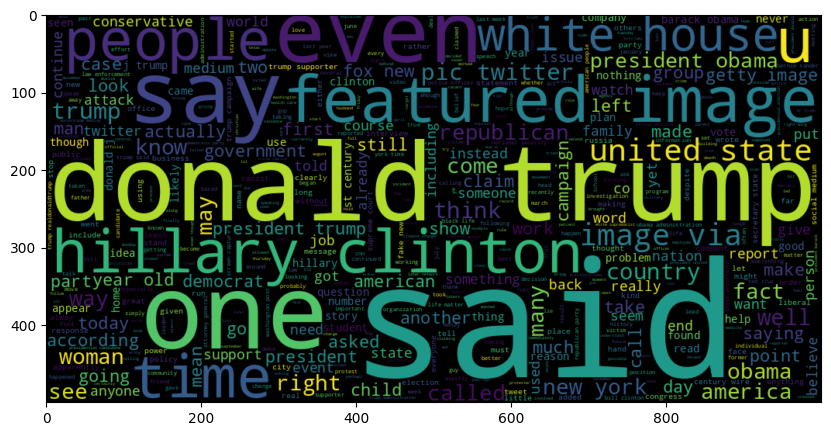

In [37]:
# visualization of the new data(processed data)
#word cloud for fake news
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(news[news["class"] == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

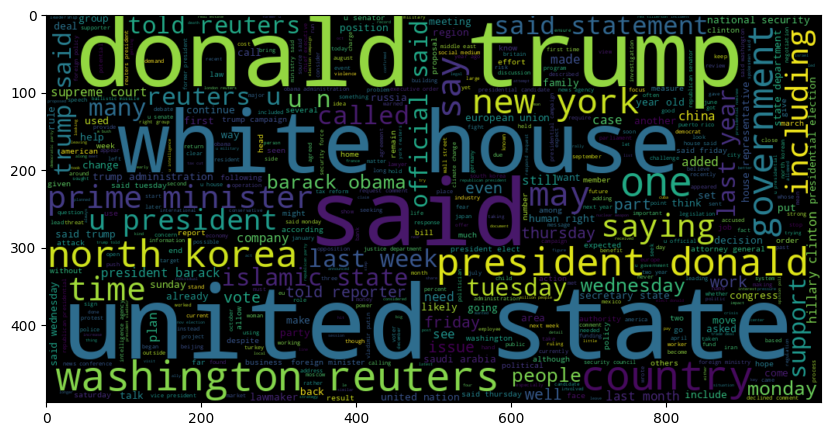

In [38]:
plt.figure(figsize=(10,10))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(news[news["class"] == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

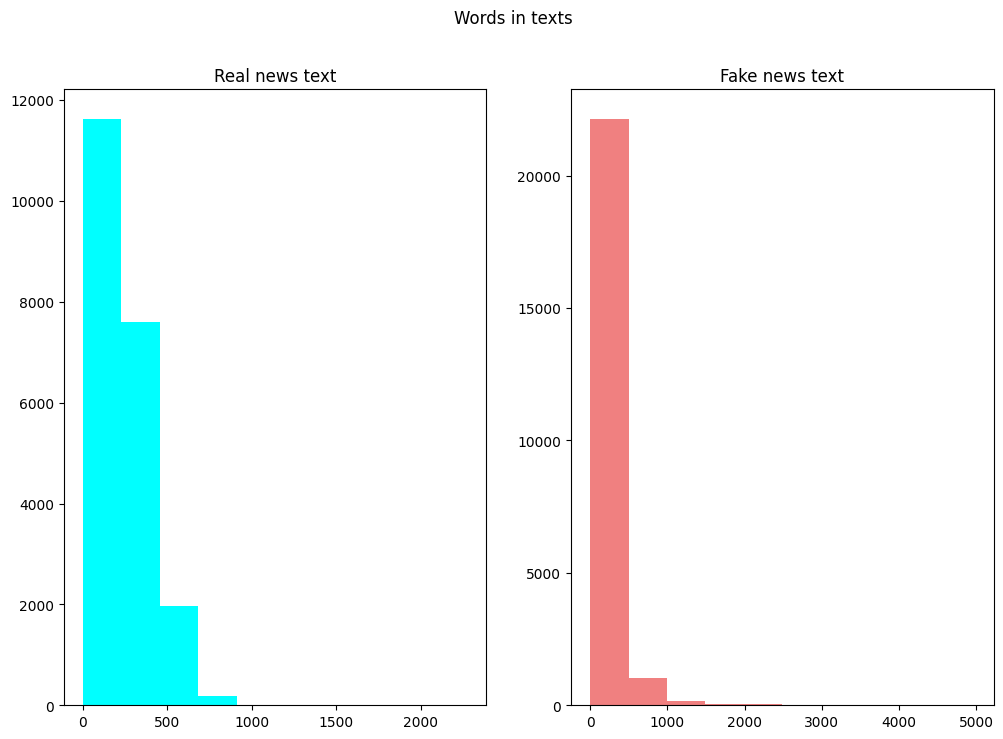

In [81]:
# number of words in text

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=news[news['class']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='cyan')
ax1.set_title('Real news text')
text_len=news[news['class']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='lightcoral')
ax2.set_title('Fake news text')
fig.suptitle('Words in texts')
plt.show()

In [79]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'X' contains the text data and 'Y' the labels

X=news["text"]
Y=news["class"]

# Vectorize the text data
vectorizer = TfidfVectorizer()  # Initialize a vectorizer
X_vectorized = vectorizer.fit_transform(X)  # Fit and transform the text data



In [80]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_vectorized, Y, test_size=0.2, stratify=Y, random_state=42
)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)  # Now the model should fit without the error

LogisticRegression()

In [77]:
X_pred=model.predict(X_test)
model_accuracy=accuracy_score(X_pred,Y_test)
print(model_accuracy)

0.9858574610244989


###Decision Tree classifier

In [78]:
model1=DecisionTreeClassifier()
model1.fit(X_train,Y_train)


DecisionTreeClassifier()

In [82]:
X_pred=model1.predict(X_test)
model_accuracy=accuracy_score(X_pred,Y_test)
print(model_accuracy)

0.9957683741648107


so the decision tree would be the opt model for this fake news problem